<a href="https://colab.research.google.com/github/star1206/IOT_2021/blob/master/%EC%BD%94%EB%A1%9C%EB%82%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.한글폰트 설치

In [ ]:
# 한글 폰트 설치하기
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 폰트 세팅
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

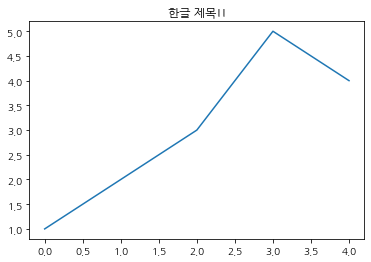

In [ ]:
# 위 코드 실행 후 [메뉴] - [런타임] - [런타임 다시 시작] - [예] 한 후 아래코드 실행
#한글제목! 제대로 보이는지 확인
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.title('한글 제목!!')
plt.plot([1,2,3,5,4])
plt.show()

#코로나 데이터 가져오기
- 경기도감염병관리지원단 사이트 : http://www.gidcc.or.kr/   감염병현황 - 코로나 19 현황 화면 에서 하단에 다운로드 클릭 - 데이터파일 선택 - 전체데이터 - 모든열, 모든 행 선택 후 csv파일 다운로드 후 업로드


  

In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터 가져오기
import pandas as pd
df = pd.read_csv('./drive/My Drive/data/corona19.csv')   #구글드라이브 마운트 한 후 데이터를 My Drive 폴더에 저장
df

In [ ]:
#데이터 확인
df.info()

In [ ]:
#데이터 컬럼확인
df.columns

Index(['기준일(발병일, 확진일 선택)', '지역 + 시 ', '필터(무증상,조사중 제외)', 'GRP', '감염경로',
       '감염경로 (그룹)', '경기번호', '구분', '구분2', '나이(만)', '무증상/조사중', '무증상/조사중 기준일',
       '성별', '연령대', '연령대별 비율', '연번', '재검출', '증상발현일', '지역', '지역 (group)',
       '필터(무증상,조사중 제외)(복사본)', '확진일-증상발현일', '확진일-증상발현일_무증상조사중포함', '확진일자', '확진자',
       '레코드 수', '무증상자수', '최종_무증상자수'],
      dtype='object')

In [ ]:
# 5개의 데이터만 확인
df.head()

In [ ]:
#데이터 요약
df.describe()

,연번,레코드 수,무증상자수,최종_무증상자수
count,28872.000000,28872.0,28872.000000,28871.000000
mean,14436.500000,1.0,0.356401,0.356378
std,8334.772822,0.0,0.478944,0.478937
min,1.000000,1.0,0.000000,0.000000
25%,7218.750000,1.0,0.000000,0.000000
50%,14436.500000,1.0,0.000000,0.000000
75%,21654.250000,1.0,1.000000,1.000000
max,28872.000000,1.0,1.000000,1.000000


In [ ]:
#해당 열의 가장 큰수 출력(가장많은 나이는)
df['나이(만)'].max()

'99'

In [ ]:
#지역별 확진자수 확인
df['지역'].value_counts()

부천       2020
성남분당     1132
의정부      1081
화성       1061
평택       1049
김포       1017
고양덕양     1005
용인기흥      943
남양주       927
광주        907
파주        899
고양일산동     852
안산단원      837
용인수지      792
시흥        789
광명        731
안양동안      726
성남수정      711
군포        692
안산상록      609
남양주풍양     590
이천        576
수원권선      575
고양일산서     554
성남중원      547
안양만안      543
구리        541
하남        515
수원영통      485
양주        474
평택송탄      455
포천        433
동두천       414
수원장안      404
용인처인      398
오산        376
수원팔달      357
안성        340
양평        311
여주        260
의왕        240
평택안중      240
연천        185
가평        150
과천        126
고양          1
Name: 지역, dtype: int64

In [ ]:
df['확진일']=pd.to_datetime(df['확진일자'])
co=df['확진일'].value_counts().sort_index()
co.to_excel("corona21.xlsx")

In [ ]:
#확진일자별 통계 확인
df['확진일'].value_counts().sort_index()

2020-01-26      1
2020-01-27      1
2020-02-01      1
2020-02-02      1
2020-02-05      2
             ... 
2021-03-28    122
2021-03-29    120
2021-03-30    107
2021-03-31    139
2021-04-01    144
Name: 확진일, Length: 411, dtype: int64

In [ ]:
#확진자수가 많은 연령 Top10


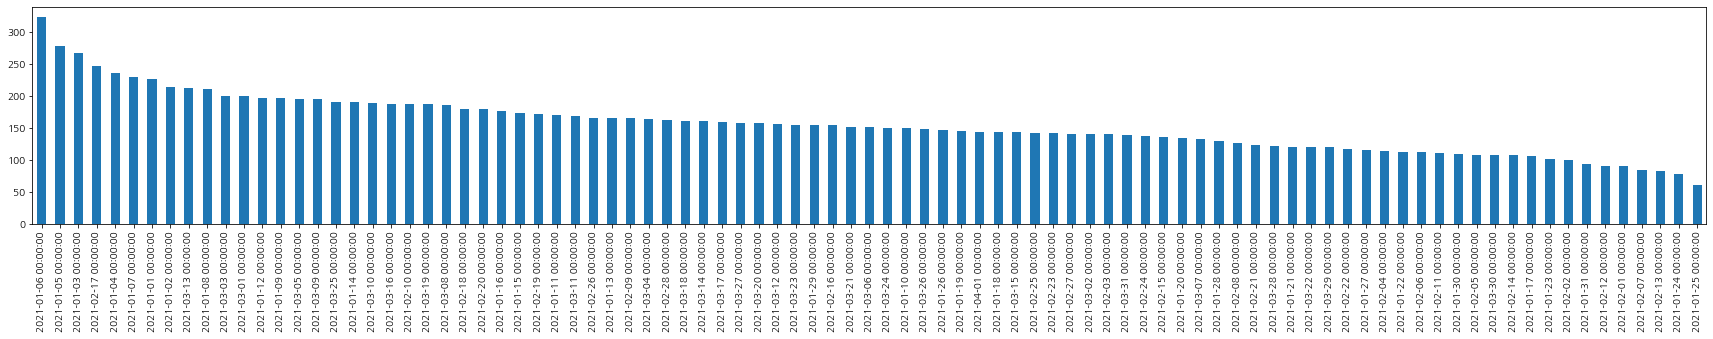

In [ ]:
#확진일자별 통계 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(30,4))
df[df['확진일'] >= '2021-01-01']['확진일'].value_counts().plot.bar()

In [ ]:
#확진일자를 날짜형식으로 변환
df['확진일']=pd.to_datetime(df['확진일자'])

In [ ]:
#조건에 해당하는 데이터만 출력(3월15일부터 3월20일의 데이터만 출력)
df[(df['확진일'] >= '2021-03-15') &

In [ ]:
#특정일자만 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(30,4))


In [ ]:
#지역별 확진자수 확인
df['지역'].value_counts()

부천       2020
성남분당     1132
의정부      1081
화성       1061
평택       1049
김포       1017
고양덕양     1005
용인기흥      943
남양주       927
광주        907
파주        899
고양일산동     852
안산단원      837
용인수지      792
시흥        789
광명        731
안양동안      726
성남수정      711
군포        692
안산상록      609
남양주풍양     590
이천        576
수원권선      575
고양일산서     554
성남중원      547
안양만안      543
구리        541
하남        515
수원영통      485
양주        474
평택송탄      455
포천        433
동두천       414
수원장안      404
용인처인      398
오산        376
수원팔달      357
안성        340
양평        311
여주        260
의왕        240
평택안중      240
연천        185
가평        150
과천        126
고양          1
Name: 지역, dtype: int64

In [ ]:
#지역별 확진자수 확인(Top5)
df['지역'].value_counts()[:5]

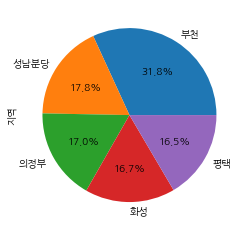

In [ ]:
# 확진자가 가장 많이 발생한 지역 Top 5 시각화
df['지역'].value_counts()[:5].plot.pie(autopct="%1.1f%%")
plt.savefig('corona.png',dpl=200)

In [ ]:
# 해당지역에서 확진자가 가장 많이 발생한 날짜 Top 10 표시하기
df[df['지역']=='성남분당']['확진일'].value_counts()[:5]

2021-02-17    24
2021-02-20    22
2021-02-18    19
2020-12-08    18
2020-12-10    16
Name: 확진일, dtype: int64

['고양일산서' '평택' '부천' '수원장안' '구리' '시흥' '김포' '이천' '포천' '안양동안' '수원팔달' '용인수지'
 '수원영통' '파주' '남양주' '성남분당' '안양만안' '과천' '수원권선' '평택안중' '광명' '화성' '용인기흥'
 '고양덕양' '오산' '용인처인' '군포' '의왕' '안산단원' '광주' '안산상록' '안성' '의정부' '성남수정' '성남중원'
 '하남' '평택송탄' '고양일산동' '동두천' '양주' '가평' '남양주풍양' '양평' '여주' '연천' '고양' nan]
위 지역 중 궁금한 지역을 입력하세요:양평


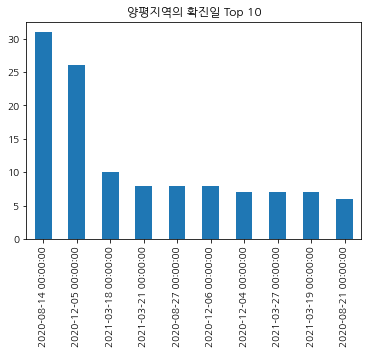

In [ ]:
# 해당지역에서 확진자가 가장 많이 발생한 날짜 Top 10 표시하기
print(df['지역'].unique())
loc=input('위 지역 중 궁금한 지역을 입력하세요:')
plt.title(loc+'지역의 확진일 Top 10')
df[df['지역']==loc]['확진일'].value_counts()[:10].plot.bar()

<과제>

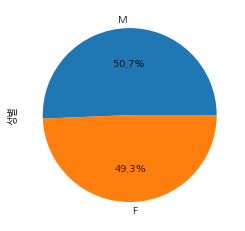

In [ ]:
#확진자 성별 현황 파이그래프로 표현하기(비율 표시로)

In [ ]:
#본인이 해보고 싶은 분석자료 그래프로 표시하기

In [ ]:
#데이터 정리하기(필요없는 데이터 삭제)
num=df[df['연령대']=='조사중'].index
blank=df[df['나이(만)']==' '].index
num=num.append(blank)
df1=df.drop(num)
df1.describe()

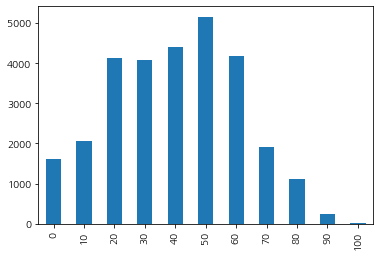

In [ ]:
df1['연령대2'] = pd.to_numeric(df1['연령대'])
df1['연령대2'].value_counts().sort_index().plot.bar()